### Clustering Warmup

This dataset is 50,000 posts from the relationships subreddit. The posts in this subreddit follow a specific format, the poster very often includes their age and their partner's age. Posts without ages for both partners, and posts without a male and female partner are excluded. The female age and male age have been extracted into the first two columns. The third column is the post's unique id, and the fourth is the text of the post.

Perform k-means clustering on the combination of male and female age. Add the predicted cluster as another column on the dataframe.

Visualize your clustering results. What do you notice? What could you change to fix this?

Play with the data! What sort of visualizations can you make, what kind of insights can you come up with?

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

In [2]:
df = pd.read_csv('50k-posts-from-relationship-advice.csv', names=['female_age', 'male_age', 'id', 'reddit_post'])

In [3]:
df.head()

,female_age,male_age,id,reddit_post
0,24,25,3iwivb,I'm [25/M] having issues with my GF [24/F] Fac...
1,18,20,3iwrcd,I [20M] asked a friend [18F] to the movies. Di...
2,17,16,3iwucq,Me (16/M) not sure if co-worker (17/F) is bein...
3,17,16,3iwx0l,Me [16/M] Not sure if my co-worker [17/F] is b...
4,26,22,3iwx5t,Me [22/M] and my GF [26/F] having been seeing ...


In [4]:
df['age_diff'] = (df.female_age - df.male_age).abs()

In [5]:
df.shape

(47540, 5)

In [6]:
df = df[(df.male_age < 80) & (df.female_age < 80)]
df = df[df.age_diff < 40]
df.shape

(47494, 5)

In [7]:
df.head()

,female_age,male_age,id,reddit_post,age_diff
0,24,25,3iwivb,I'm [25/M] having issues with my GF [24/F] Fac...,1
1,18,20,3iwrcd,I [20M] asked a friend [18F] to the movies. Di...,2
2,17,16,3iwucq,Me (16/M) not sure if co-worker (17/F) is bein...,1
3,17,16,3iwx0l,Me [16/M] Not sure if my co-worker [17/F] is b...,1
4,26,22,3iwx5t,Me [22/M] and my GF [26/F] having been seeing ...,4


In [14]:
from sklearn.cluster import KMeans

X = df[['female_age', 'male_age']]

kmeans = KMeans(n_clusters=7)
kmeans.fit(X)

df['cluster'] = pd.Series(kmeans.predict(X))


In [11]:
import seaborn as sns

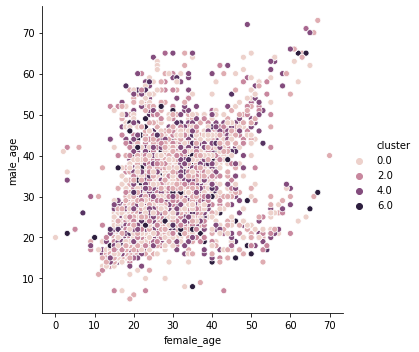

In [17]:
sns.relplot(x='female_age', y='male_age', data=df, hue='cluster')

In [79]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

In [80]:
X.head()

,female_age,male_age,cluster
0,24,25,3
1,18,20,0
2,17,16,0
3,17,16,0
4,26,22,6
